**Proyek Analisis Sentimen**

*   Nama : Anju Anjannah
*   Username : anjunjnnh
*   Domisili : Surabaya, Jawa Timur
*   Email : anjannahanju@gmail.com


# **Import Library**

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Scrapping Dataset**

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app, reviews_all, Sort

scrapreview =  reviews_all(
    'com.ruangguru.livestudents',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=10000
)

In [ ]:
import csv

with open('hasil_scrapping.csv', mode='w', newline='', encoding='utf-8')as file:
    writer = csv.writer(file)
    writer.writerow(['review'])
    for review in scrapreview:
        writer.writerow([review['content']])

# **Loading Dataset**

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('hasil_scrapping.csv', index=False)

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)

jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
print(f"Jumlah Ulasan: {jumlah_ulasan}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Ulasan: 204337
Jumlah Kolom: 11


In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,47d265ed-1dd2-4e19-9510-6549d35ab20a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat bagus, fitur menarik, grafik bisa diatu...",5,13,6.89.1,2024-09-11 12:16:25,None,NaT,6.89.1
1,f02aac2f-a614-4c67-b165-29d8d986b0d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah jadi byk bugnya 😔. Yg awa...,2,10,6.89.0,2024-09-05 02:09:58,Pastikan kecepatan internetmu minimal 2 Mbps (...,2024-09-14 05:49:03,6.89.0
2,c299297e-5c10-4ff3-becc-be378dcbf16e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ruang guru sangat membantu untuk lebi...,4,39,6.87.1,2024-08-15 15:10:30,Thank you ya Naifah buat feedback yang diberik...,2024-08-20 10:05:21,6.87.1
3,4a7cdf79-893c-49ea-8332-a8fa15044f38,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulillah ada aplikasi ini yang membantu s...,3,4,6.89.0,2024-09-04 16:17:26,Pastikan kecepatan internetmu minimal 2 Mbps (...,2024-09-14 05:21:16,6.89.0
4,9f432849-c9e9-4b59-82b2-1da4f161d9d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Apk nya baguss bangettt,, tapi aku ada sedikit...",5,892,6.83.0,2024-07-13 16:33:24,Makasih ya Azqya buat Saran dan bintang 5-nya....,2024-07-22 07:29:58,6.83.0


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204337 entries, 0 to 204336
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              204337 non-null  object        
 1   userName              204337 non-null  object        
 2   userImage             204337 non-null  object        
 3   content               204332 non-null  object        
 4   score                 204337 non-null  int64         
 5   thumbsUpCount         204337 non-null  int64         
 6   reviewCreatedVersion  132057 non-null  object        
 7   at                    204337 non-null  datetime64[ns]
 8   replyContent          202298 non-null  object        
 9   repliedAt             202298 non-null  datetime64[ns]
 10  appVersion            132057 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 17.1+ MB


In [ ]:
clean_df = app_reviews_df.dropna()

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131494 entries, 1 to 173723
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              131494 non-null  object        
 1   userName              131494 non-null  object        
 2   userImage             131494 non-null  object        
 3   content               131494 non-null  object        
 4   score                 131494 non-null  int64         
 5   thumbsUpCount         131494 non-null  int64         
 6   reviewCreatedVersion  131494 non-null  object        
 7   at                    131494 non-null  datetime64[ns]
 8   replyContent          131494 non-null  object        
 9   repliedAt             131494 non-null  datetime64[ns]
 10  appVersion            131494 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 12.0+ MB


In [ ]:
clean_df = clean_df.drop_duplicates()

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(f"Jumlah Ulasan Setelah Hapus Duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")
print(f"Jumlah Kolom: {jumlah_kolom_setelah_hapus_duplikat}")

Jumlah Ulasan Setelah Hapus Duplikat: 131494
Jumlah Kolom: 11


# **Preprocessing**

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

In [ ]:
def casefoldingText(text):
    text = text.lower()
    return text

In [ ]:
def tokenizingText(text):
    text = word_tokenize(text)
    return text

In [ ]:
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [ ]:
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1,f02aac2f-a614-4c67-b165-29d8d986b0d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah jadi byk bugnya 😔. Yg awa...,2,10,6.89.0,2024-09-05 02:09:58,Pastikan kecepatan internetmu minimal 2 Mbps (...,2024-09-14 05:49:03,6.89.0
2,c299297e-5c10-4ff3-becc-be378dcbf16e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ruang guru sangat membantu untuk lebi...,4,39,6.87.1,2024-08-15 15:10:30,Thank you ya Naifah buat feedback yang diberik...,2024-08-20 10:05:21,6.87.1
3,4a7cdf79-893c-49ea-8332-a8fa15044f38,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulillah ada aplikasi ini yang membantu s...,3,4,6.89.0,2024-09-04 16:17:26,Pastikan kecepatan internetmu minimal 2 Mbps (...,2024-09-14 05:21:16,6.89.0
4,9f432849-c9e9-4b59-82b2-1da4f161d9d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Apk nya baguss bangettt,, tapi aku ada sedikit...",5,892,6.83.0,2024-07-13 16:33:24,Makasih ya Azqya buat Saran dan bintang 5-nya....,2024-07-22 07:29:58,6.83.0
5,db67766f-7b18-4de4-8179-252a8e75d5e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"animasinya lucu bangett, cocok buat saya yang ...",5,517,6.86.1,2024-07-31 12:41:36,Makasih ya Bita buat bintang 5-nya. Kami senan...,2024-08-01 05:55:38,6.86.1
...,...,...,...,...,...,...,...,...,...,...,...
173719,49397521-b751-4036-a426-eaed299ba7bd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Rada kesel juga sih udah nunggu lama tapi guru...,2,2,0.2.0,2016-03-21 12:43:00,"Hi Andi,\nTerima kasih atas feedbacknya dan mo...",2016-03-23 04:51:06,0.2.0
173720,1afa19d6-3979-4ed6-9c37-5a5bdb4eefa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ndak bisa daftarrrr!,1,0,0.2.0,2016-03-22 22:14:51,"Hi Andi,\nTerima kasih atas feedbacknya dan mo...",2016-03-23 04:47:50,0.2.0
173721,b7b8d16b-e99a-4c22-812c-85351ff6f93e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi belum bisa digunakan, ga bisa login m...",1,2,0.1.6,2016-03-08 17:44:09,"Hi Bapak Fesy,\nTerima kasih atas feedbacknya ...",2016-03-08 21:55:47,0.1.6
173722,bd9c1a87-0db8-4e6e-a726-3aafcef12304,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Masih belum bisa Log In, harap segera perbaiki",1,0,0.1.6,2016-03-08 07:55:19,"Hi Arrifqi,\nTerima kasih atas feedbacknya dan...",2016-03-08 21:55:27,0.1.6


In [ ]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
1,f02aac2f-a614-4c67-b165-29d8d986b0d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah jadi byk bugnya 😔. Yg awa...,2,10,6.89.0,2024-09-05 02:09:58,Pastikan kecepatan internetmu minimal 2 Mbps (...,2024-09-14 05:49:03,6.89.0,Setelah update malah jadi byk bugnya Yg awaln...,setelah update malah jadi byk bugnya yg awaln...,setelah update bahkan jadi banyak bugnya yang ...,"[setelah, update, bahkan, jadi, banyak, bugnya...","[update, bugnya, home, utbk, center, skrg, dmn...",update bugnya home utbk center skrg dmn bukany...
2,c299297e-5c10-4ff3-becc-be378dcbf16e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ruang guru sangat membantu untuk lebi...,4,39,6.87.1,2024-08-15 15:10:30,Thank you ya Naifah buat feedback yang diberik...,2024-08-20 10:05:21,6.87.1,Aplikasi ruang guru sangat membantu untuk lebi...,aplikasi ruang guru sangat membantu untuk lebi...,aplikasi ruang guru sangat membantu untuk lebi...,"[aplikasi, ruang, guru, sangat, membantu, untu...","[aplikasi, ruang, guru, membantu, memahami, pe...",aplikasi ruang guru membantu memahami pelajara...
3,4a7cdf79-893c-49ea-8332-a8fa15044f38,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulillah ada aplikasi ini yang membantu s...,3,4,6.89.0,2024-09-04 16:17:26,Pastikan kecepatan internetmu minimal 2 Mbps (...,2024-09-14 05:21:16,6.89.0,Alhamdulillah ada aplikasi ini yang membantu s...,alhamdulillah ada aplikasi ini yang membantu s...,alhamdulillah ada aplikasi ini yang membantu s...,"[alhamdulillah, ada, aplikasi, ini, yang, memb...","[alhamdulillah, aplikasi, membantu, pembelajar...",alhamdulillah aplikasi membantu pembelajaranna...
4,9f432849-c9e9-4b59-82b2-1da4f161d9d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Apk nya baguss bangettt,, tapi aku ada sedikit...",5,892,6.83.0,2024-07-13 16:33:24,Makasih ya Azqya buat Saran dan bintang 5-nya....,2024-07-22 07:29:58,6.83.0,Apk nya baguss bangettt tapi aku ada sedikit k...,apk nya baguss bangettt tapi aku ada sedikit k...,apk nya baguss bangettt tapi aku ada sedikit k...,"[apk, nya, baguss, bangettt, tapi, aku, ada, s...","[apk, baguss, bangettt, kritik, tampilan, laya...",apk baguss bangettt kritik tampilan layar web ...
5,db67766f-7b18-4de4-8179-252a8e75d5e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"animasinya lucu bangett, cocok buat saya yang ...",5,517,6.86.1,2024-07-31 12:41:36,Makasih ya Bita buat bintang 5-nya. Kami senan...,2024-08-01 05:55:38,6.86.1,animasinya lucu bangett cocok buat saya yang g...,animasinya lucu bangett cocok buat saya yang g...,animasinya lucu bangett cocok buat saya yang g...,"[animasinya, lucu, bangett, cocok, buat, saya,...","[animasinya, lucu, bangett, cocok, gaya, belaj...",animasinya lucu bangett cocok gaya belajarnya ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173719,49397521-b751-4036-a426-eaed299ba7bd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Rada kesel juga sih udah nunggu lama tapi guru...,2,2,0.2.0,2016-03-21 12:43:00,"Hi Andi,\nTerima kasih atas feedbacknya dan mo...",2016-03-23 04:51:06,0.2.0,Rada kesel juga sih udah nunggu lama tapi guru...,rada kesel juga sih udah nunggu lama tapi guru...,rada kesel juga sih sudah nunggu lama tapi gur...,"[rada, kesel, juga, sih, sudah, nunggu, lama, ...","[rada, kesel, nunggu, gurunya, balas, pesannya]",rada kesel nunggu gurunya balas pesannya
173720,1afa19d6-3979-4ed6-9c37-5a5bdb4eefa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ndak bisa daftarrrr!,1,0,0.2.0,2016-03-22 22:14:51,"Hi Andi,\nTerima kasih atas feedbacknya dan mo...",2016-03-23 04:47:50,0.2.0,Ndak bisa daftarrrr,ndak bisa daftarrrr,tidak bisa daftarrrr,"[tidak, bisa, d

# **Pelabelan**

In [ ]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')


if response.status_code == 200:

    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:

        lexicon_positive[row[0]] = int(row[1])

else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')


if response.status_code == 200:

    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else :
        polarity = 'neutral'

    return score, polarity

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    65250
negative    33467
neutral     32777
Name: count, dtype: int64


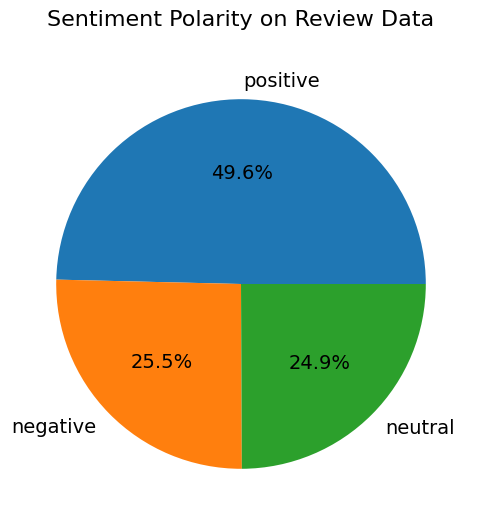

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]

labels = list(clean_df['polarity'].value_counts().index)

explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

In [ ]:
pd.set_option('display.max_colwidth',5000)

positive_reviews = clean_df[clean_df['polarity'] == 'positive']

positive_reviews = positive_reviews[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

positive_reviews = positive_reviews.sort_values(by='polarity_score', ascending=False)

positivie_reviews = positive_reviews.reset_index(drop=True)

positive_reviews.index += 1

In [ ]:
pd.set_option('display.max_colwidth',5000)

negative_reviews = clean_df[clean_df['polarity'] == 'negative']

negative_reviews = negative_reviews[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

negative_reviews = negative_reviews.sort_values(by='polarity_score', ascending=False)

negativie_reviews = negative_reviews.reset_index(drop=True)

negative_reviews.index += 1

In [ ]:
pd.set_option('display.max_colwidth',5000)

neutral_reviews = clean_df[clean_df['polarity'] == 'neutral']

neutral_reviews = neutral_reviews[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

neutral_reviews = neutral_reviews.sort_values(by='polarity_score', ascending=False)

neutral_reviews = neutral_reviews[0:10]

neutral_reviews = neutral_reviews.reset_index(drop=True)

neutral_reviews.index += 1

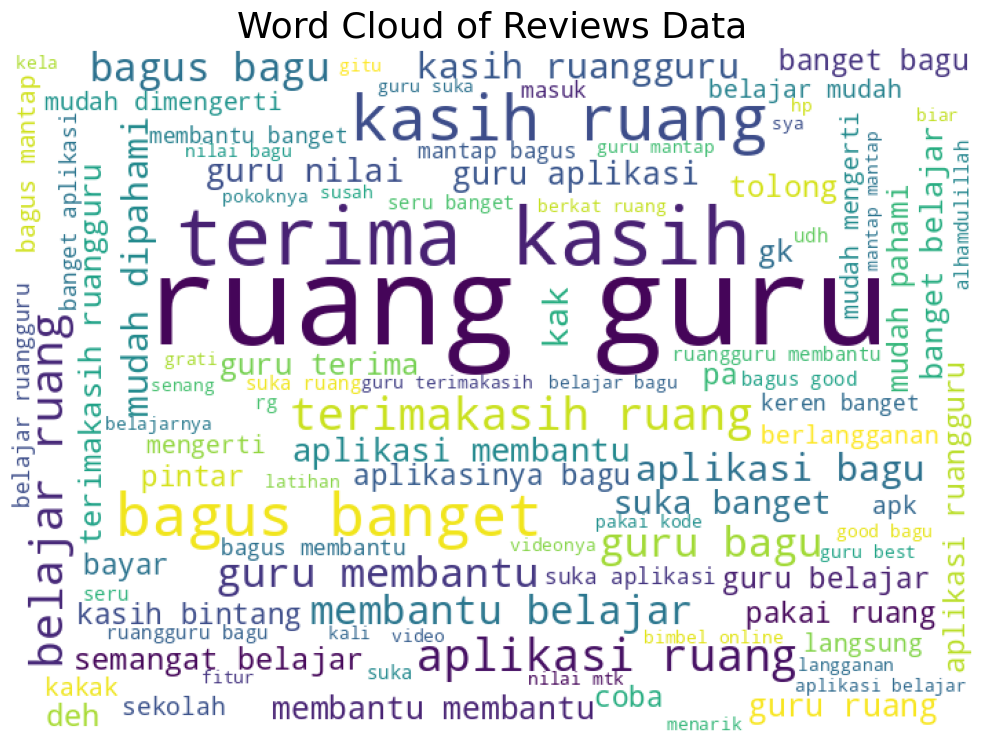

In [ ]:
list_word = ''

for reviews in clean_df['text_stopword']:
    for word in reviews :
        list_word += ' ' + (word)

wordcloud = WordCloud(width=700, height=500, background_color='white', min_font_size=12).generate(list_word)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Word Cloud of Reviews Data', fontsize=26)

ax.grid(False)

ax.imshow(wordcloud)

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()

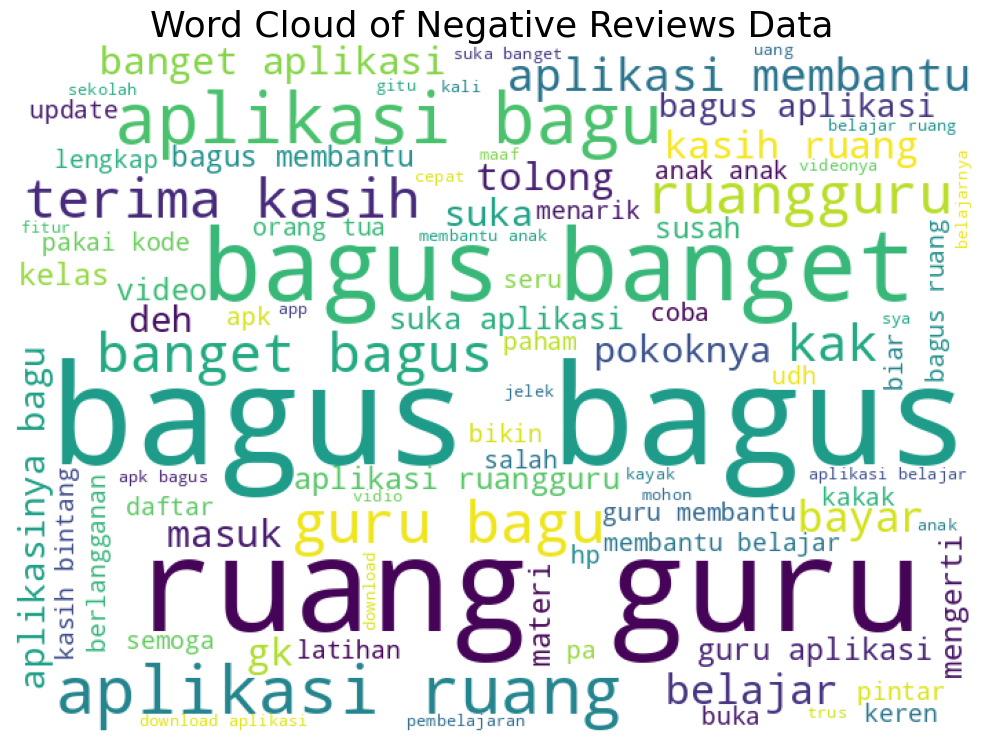

In [ ]:
list_word = ''

for reviews in negative_reviews['text_stopword']:
    for word in reviews :
        list_word += ' ' + (word)

wordcloud = WordCloud(width=700, height=500, background_color='white', min_font_size=12).generate(list_word)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Word Cloud of Negative Reviews Data', fontsize=26)

ax.grid(False)

ax.imshow(wordcloud)

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()

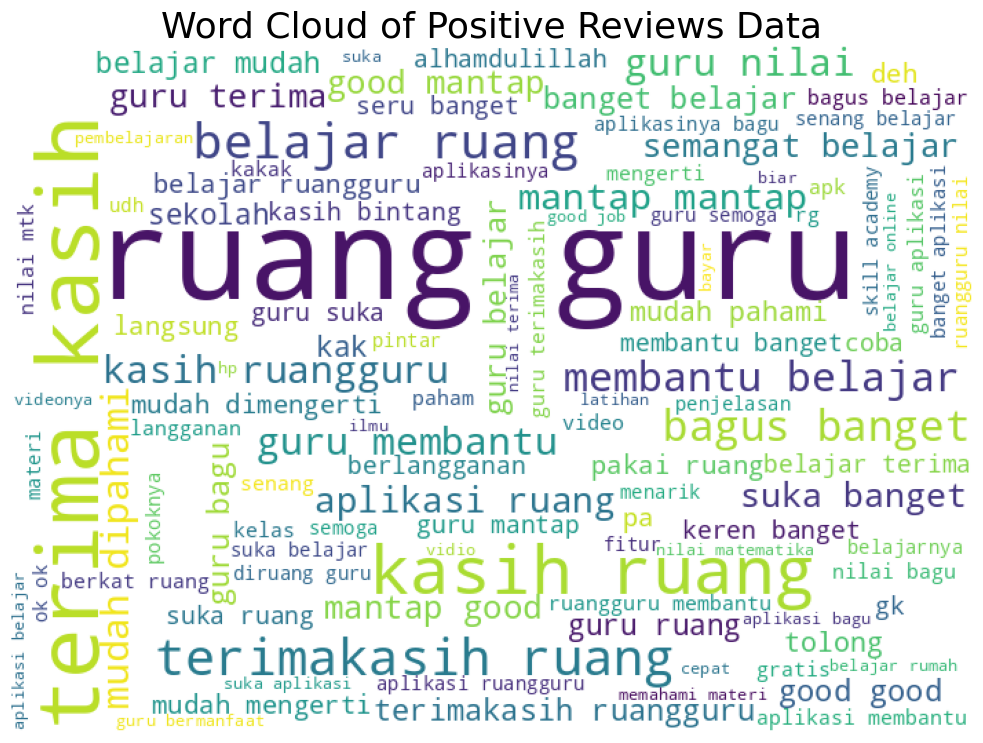

In [ ]:
list_word = ''

for reviews in positive_reviews['text_stopword']:
    for word in reviews :
        list_word += ' ' + (word)

wordcloud = WordCloud(width=700, height=500, background_color='white', min_font_size=12).generate(list_word)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Word Cloud of Positive Reviews Data', fontsize=26)

ax.grid(False)

ax.imshow(wordcloud)

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()

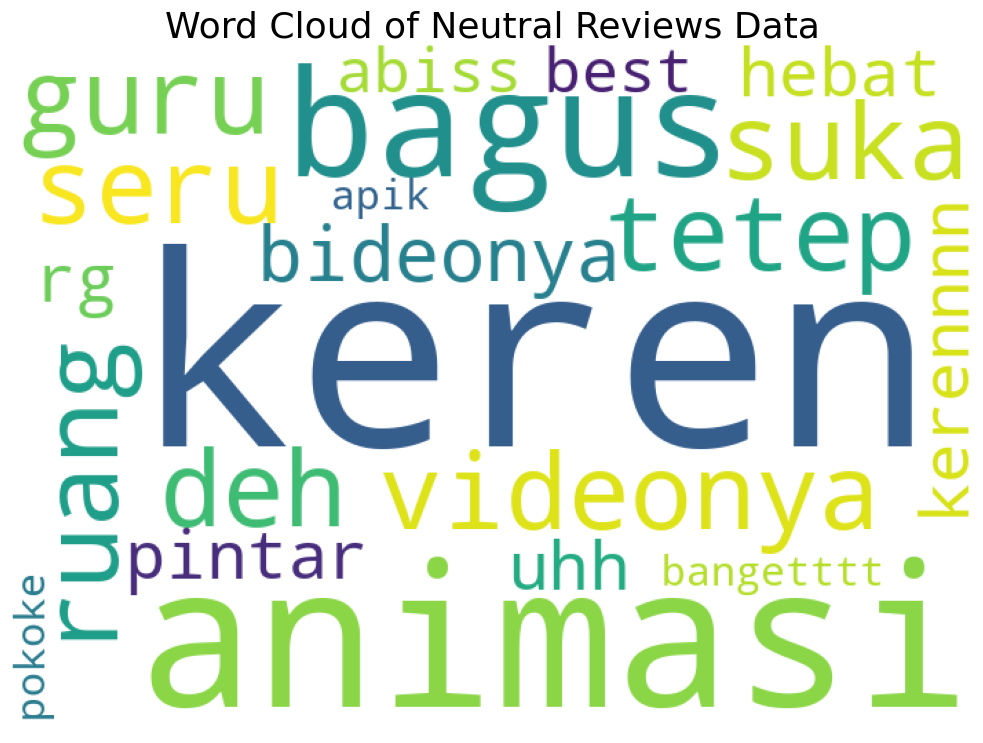

In [ ]:
list_word = ''

for reviews in neutral_reviews['text_stopword']:
    for word in reviews :
        list_word += ' ' + (word)

wordcloud = WordCloud(width=700, height=500, background_color='white', min_font_size=12).generate(list_word)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Word Cloud of Neutral Reviews Data', fontsize=26)

ax.grid(False)

ax.imshow(wordcloud)

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()

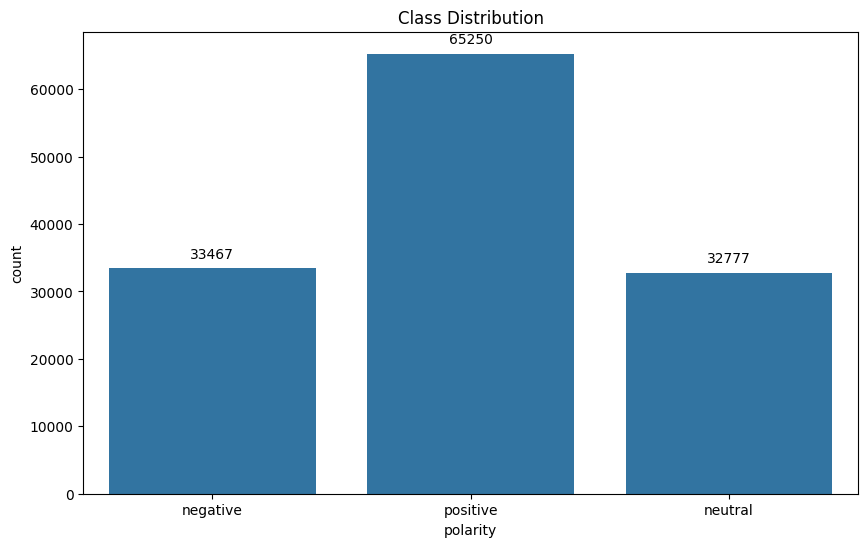

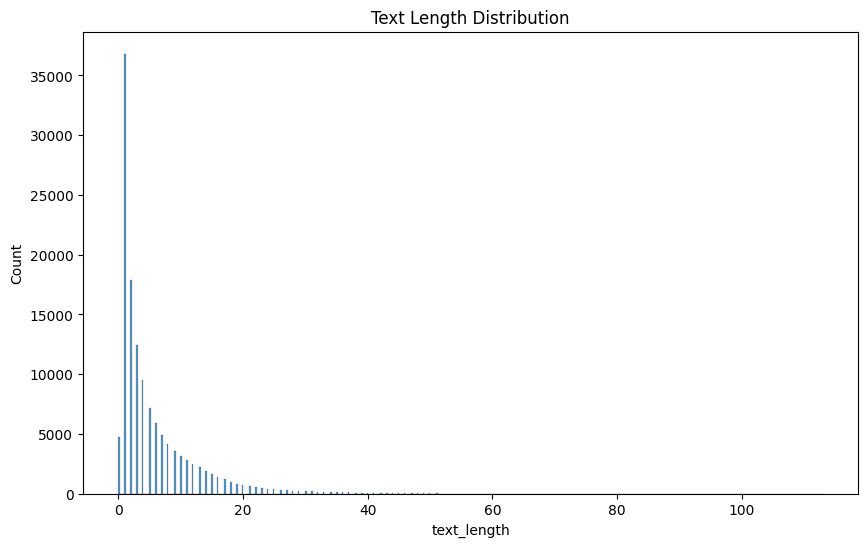

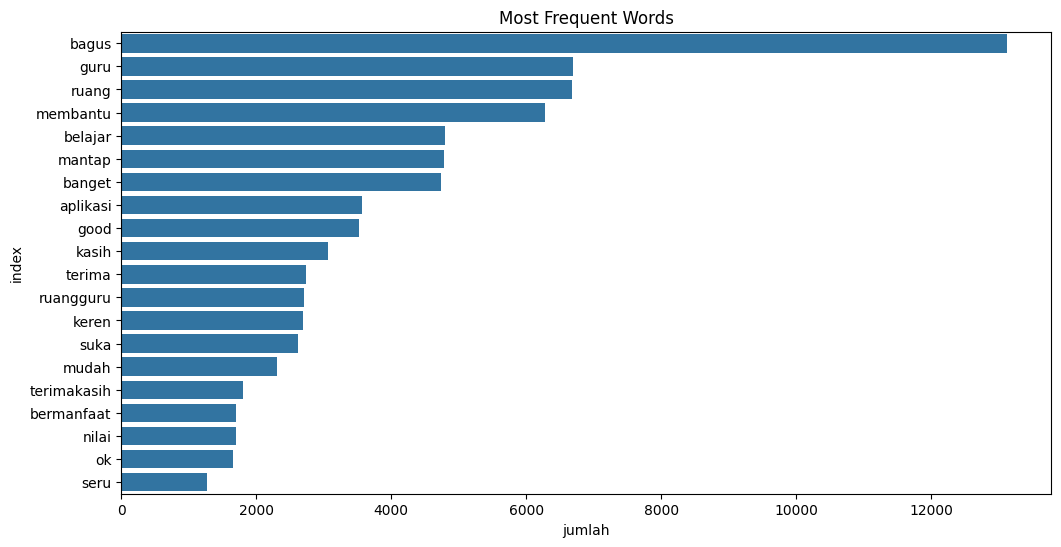

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(10, 6))

class_dict_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dict_plot.patches:
    class_dict_plot.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')
plt.show()

plt.figure(figsize=(10, 6))

clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

# **Data Splitting**

In [ ]:
clean_df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
1,f02aac2f-a614-4c67-b165-29d8d986b0d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Setelah update malah jadi byk bugnya 😔. Yg awalnya di home ada bagian UTBK center skrg jd ga ada, aku gtw dmn buat bukanya, skrgg bisanya buka lewat widget. Smart schedule SNBTnya ga bekerja (blm bisa dipake karena katanya blm ngerjain TO samsek pdhl udh pernah sekali), muncul tulisan sdg terjadi kesalahn sistem trs. Peluang lolos di prodi tertentu jg ga muncul pdhl udh TO. Mohon diperbaiki segera yaa, butuh soalnya dan sdh bayar. Syg klo udh bayar mahal2 tp fitur2nya ga bekerja maksimal",2,10,6.89.0,2024-09-05 02:09:58,"Pastikan kecepatan internetmu minimal 2 Mbps (cek di laman fast.com) ya Nora. Kalau masih terkendala, maka jangan khawatir. Jelasin dulu yuk detailnya ke email info@ruangguru.com dengan nomor tiket 2275143 biar dibantu pengecekan lebih lanjut 🙏 - RN",2024-09-14 05:49:03,6.89.0,Setelah update malah jadi byk bugnya Yg awalnya di home ada bagian UTBK center skrg jd ga ada aku gtw dmn buat bukanya skrgg bisanya buka lewat widget Smart schedule SNBTnya ga bekerja blm bisa dipake karena katanya blm ngerjain TO samsek pdhl udh pernah sekali muncul tulisan sdg terjadi kesalahn sistem trs Peluang lolos di prodi tertentu jg ga muncul pdhl udh TO Mohon diperbaiki segera yaa butuh soalnya dan sdh bayar Syg klo udh bayar mahal tp fiturnya ga bekerja maksimal,setelah update malah jadi byk bugnya yg awalnya di home ada bagian utbk center skrg jd ga ada aku gtw dmn buat bukanya skrgg bisanya buka lewat widget smart schedule snbtnya ga bekerja blm bisa dipake karena katanya blm ngerjain to samsek pdhl udh pernah sekali muncul tulisan sdg terjadi kesalahn sistem trs peluang lolos di prodi tertentu jg ga muncul pdhl udh to mohon diperbaiki segera yaa butuh soalnya dan sdh bayar syg klo udh bayar mahal tp fiturnya ga bekerja maksimal,setelah update bahkan jadi banyak bugnya yang awalnya di home ada bagian utbk center skrg jadi ga ada aku tidak tahu dmn buat bukanya skrgg bisanya buka lewat widget smart schedule snbtnya ga bekerja belum bisa dipake karena katanya belum ngerjain to sama sekali pdhl udh pernah sekali muncul tulisan sdg terjadi kesalahn sistem terus peluang lolos di prodi tertentu juga ga muncul pdhl udh to mohon diperbaiki segera yaa butuh soalnya dan sdh bayar sayang kalau udh bayar mahal tapi fiturnya ga bekerja maksimal,"[setelah, update, bahkan, jadi, banyak, bugnya, yang, awalnya, di, home, ada, bagian, utbk, center, skrg, jadi, ga, ada, aku, tidak, tahu, dmn, buat, bukanya, skrgg, bisanya, buka, lewat, widget, smart, schedule, snbtnya, ga, bekerja, belum, bisa, dipake, karena, katanya, belum, ngerjain, to, sama, sekali, pdhl, udh, pernah, sekali, muncul, tulisan, sdg, terjadi, kesalahn, sistem, terus, peluang, lolos, di, prodi, tertentu, juga, ga, muncul, pdhl, udh, to, mohon, diperbaiki, segera, yaa, butuh, soalnya, dan, sdh, bayar, sayang, kalau, udh, bayar, mahal, tapi, fiturnya, ga, bekerja, maksimal]","[update, bugnya, home, utbk, center, skrg, dmn, bukanya, skrgg, bisanya, buka, widget, smart, schedule, snbtnya, dipake, ngerjain, pdhl, udh, muncul, tulisan, sdg, kesalahn, sistem, peluang, lolos, prodi, muncul, pdhl, udh, mohon, diperbaiki, butuh, sdh, bayar, sayang, udh, bayar, mahal, fiturnya, maksimal]",update bugnya home utbk center skrg dmn bukanya skrgg bisanya buka widget smart schedule snbtnya dipake ngerjain pdhl udh muncul tulisan sdg kesalahn sistem peluang lolos prodi muncul pdhl udh mohon diperbaiki butuh sdh bayar sayang udh bayar mahal fiturnya maksimal,-19,negative,41
2,c299297e-5c10-4ff3-becc-be378dcbf16e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJ

In [ ]:
X = clean_df['text_akhir']
y = clean_df['polarity']

In [ ]:
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

,academy,alhamdulillah,anak,animasi,animasinya,apk,aplikasi,aplikasinya,app,asik,...,udh,ujian,ulangan,update,video,videonya,vidio,vidionya,wow,yah
0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.709554,0.000000,0.0,0.247508,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.201621,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.385022,0.288353,0.0,0.0,0.0,0.0,0.0
2,0.0,0.334331,0.0,0.0,0.000000,0.00000,0.594914,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.22386,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.278933,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.272844,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131489,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
131490,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
131491,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.352186,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
131492,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **Pemodelan Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()

naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8075383811017633
Naive Bayes - accuracy_test: 0.8066466405566751


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9630685869100243
Random Forest - accuracy_test: 0.8973725236701016


# **Logistik Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - accuracy_train: 0.9123817671942582
Logistic Regression - accuracy_test: 0.909996577816647


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train.toarray(), y_train)

y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9630685869100243
Decision Tree - accuracy_test: 0.8714019544469371


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})

accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.806647
1        Random Forest       0.897373
2  Logistic Regression       0.909997
3        Decision Tree       0.871402


In [ ]:
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

print(accuracy_test_sorted)

                 Model  Accuracy Test
2  Logistic Regression       0.909997
1        Random Forest       0.897373
3        Decision Tree       0.871402
0          Naive Bayes       0.806647


In [ ]:
kalimat_baru = input("Masukkan kalimat baru: ")

kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

X_kalimat_baru = tfidf.transform([kalimat_baru_final])

prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    if prediksi_sentimen[0] == 'neutral':
        print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru: aplikasinya sangat membantu
Sentimen kalimat baru adalah NETRAL.


In [86]:
pip freeze > requirements.txt